In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Exibir versão das principais bibliotecas (opcional, mas profissional)
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")

Pandas: 2.3.3
Numpy: 2.3.4
Seaborn: 0.13.2


### 1. Importação de Bibliotecas

**pandas** (pd) → Manipulação e análise de dados em tabelas (DataFrames).
**numpy** (np) → Operações matemáticas e trabalho com arrays multidimensionais
**matplotlib.pyplot** (plt) → Criação de gráficos e visualizações personalizadas.
**seaborn** (sns) → Visualizações estatísticas com gráficos elegantes e integrados ao pandas.
**scipy.stats** → Funções estatísticas e testes de hipóteses.
**warnings** → Controle e filtragem de avisos gerados durante a execução do código.

In [5]:
df = pd.read_csv('../data/datasets/students_performance.csv')
df.head()
df.tail()
print("Dimensões do dataset:")
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")
df.info()
df.describe()

Dimensões do dataset:
Linhas: 2510
Colunas: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          2510 non-null   object 
 1   age                 2510 non-null   int64  
 2   gender              2510 non-null   object 
 3   parental_education  2510 non-null   object 
 4   study_hours_week    2217 non-null   float64
 5   attendance_rate     2278 non-null   float64
 6   extracurricular     2510 non-null   object 
 7   sleep_hours         2244 non-null   float64
 8   previous_scores     2383 non-null   float64
 9   tutoring            2510 non-null   object 
 10  internet_quality    2355 non-null   object 
 11  family_income       2232 non-null   object 
 12  health_status       2510 non-null   object 
 13  final_grade         2510 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 274.7+ K

,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade
count,2510.000000,2217.000000,2278.000000,2244.000000,2383.000000,2510.000000
mean,21.623904,10.603554,59.679789,6.996569,57.261028,92.090076
std,2.766664,8.635456,10.611523,1.336190,9.477943,7.446434
min,17.000000,-3.620000,20.820000,2.070000,21.200000,63.240000
25%,20.000000,6.510000,52.840000,6.130000,51.105000,86.982500
50%,22.000000,9.960000,59.905000,6.990000,57.300000,93.310000
75%,24.000000,13.400000,66.652500,7.830000,63.620000,99.850000
max,99.000000,113.200000,108.950000,15.950000,86.100000,101.070000


### 2. Carregamento dos Dados

Ele possui:
* Linhas: 2510
* Colunas: 14

As variaveis representao coisas como idade, horas de estudo na semana, horas de sono, educação dos pais e etc.


In [11]:
df.dtypes
categorica = df.select_dtypes(include=['object']).columns.tolist()
numerica = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variáveis categóricas:", categorica)
print("Variáveis numéricas:", numerica)


Variáveis categóricas: ['student_id', 'gender', 'parental_education', 'extracurricular', 'tutoring', 'internet_quality', 'family_income', 'health_status']
Variáveis numéricas: ['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores', 'final_grade']


### 3. Visão Geral do Dataset

**Variáveis categóricas:**
  - `student_id`
  - `gender`
  - `parental_education`
  - `extracurricular`
  - `tutoring`
  - `internet_quality`
  - `family_income`
  - `health_status`

- **Variáveis numéricas:**
  - `age`
  - `study_hours_week`
  - `attendance_rate`
  - `sleep_hours`
  - `previous_scores`
  - `final_grade`

- **Variável de identificação:**  
  - `student_id` (identifica exclusivamente cada aluno e **não deve ser usada** como feature nos modelos).

- **Variável alvo:**  
  - `final_grade` — representa a **nota final** do estudante e será a variável que queremos **prever ou analisar**.

- **Features (variáveis explicativas):**  
  - Todas as demais colunas, exceto `student_id` e `final_grade`.  
  - São os fatores que **podem influenciar** o desempenho final dos alunos, como horas de estudo, presença, sono, renda familiar, etc.


Valores faltantes por coluna:
student_id              0
age                     0
gender                  0
parental_education      0
study_hours_week      293
attendance_rate       232
extracurricular         0
sleep_hours           266
previous_scores       127
tutoring                0
internet_quality      155
family_income         278
health_status           0
final_grade             0
dtype: int64

Percentual de valores faltantes por coluna:
student_id             0.000000
age                    0.000000
gender                 0.000000
parental_education     0.000000
study_hours_week      11.673307
attendance_rate        9.243028
extracurricular        0.000000
sleep_hours           10.597610
previous_scores        5.059761
tutoring               0.000000
internet_quality       6.175299
family_income         11.075697
health_status          0.000000
final_grade            0.000000
dtype: float64


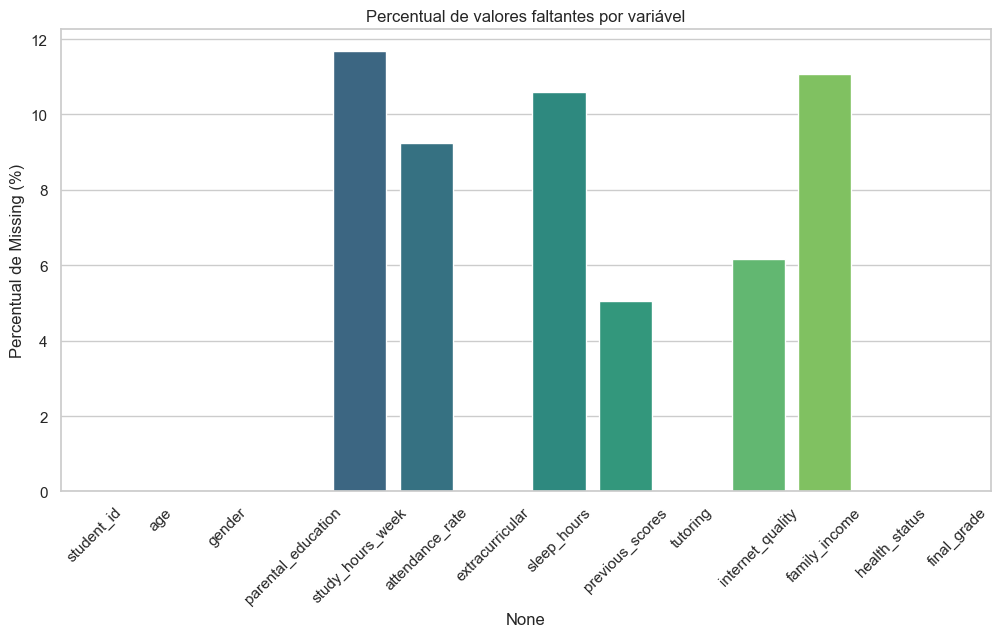


Percentual de missing em 'study_hours_week' por gênero:
gender
    M       0.000000
  F        12.500000
  M        20.000000
F          11.093991
Female     50.000000
M          12.184874
Male        0.000000
Name: study_hours_week, dtype: float64


In [14]:
# Ignorar warnings para deixar a saída limpa
warnings.filterwarnings("ignore")

# Contagem de valores faltantes por coluna
missing_counts = df.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_counts)

# Percentual de valores faltantes por coluna
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentual de valores faltantes por coluna:")
print(missing_percent)

# Configuração estética
sns.set(style="whitegrid")

# Gráfico de barras do percentual de missing
plt.figure(figsize=(12,6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")
plt.ylabel("Percentual de Missing (%)")
plt.xticks(rotation=45)
plt.title("Percentual de valores faltantes por variável")
plt.show()

# Exemplo: ver se missing em study_hours_week varia por gênero
if 'study_hours_week' in df.columns and 'gender' in df.columns:
    missing_by_gender = df.groupby('gender')['study_hours_week'].apply(lambda x: x.isnull().mean() * 100)
    print("\nPercentual de missing em 'study_hours_week' por gênero:")
    print(missing_by_gender)

### 4. Análise de Valores Faltantes
**Variável com mais valores faltantes:**  
  - `parental_education`

**Os valores faltantes parecem aleatórios ou seguem algum padrão?** 
  - `As variaveis com mais faltas são relacionadas a familia ou a rotina.`

**Sugira possíveis tratamentos:**
  - `Remoção de dados` (Útil quando apenas algumas linhas têm missing e você não quer imputar.)
    * Remover linhas com muitos valores faltantes..
    * Remover colunas com muitos missing (ex: >50%).

Estatísticas descritivas de 'final_grade':

count    2510.000000
mean       92.090076
std         7.446434
min        63.240000
25%        86.982500
50%        93.310000
75%        99.850000
max       101.070000
Name: final_grade, dtype: float64

Skewness (assimetria): -0.76
Kurtosis (curtose): -0.13


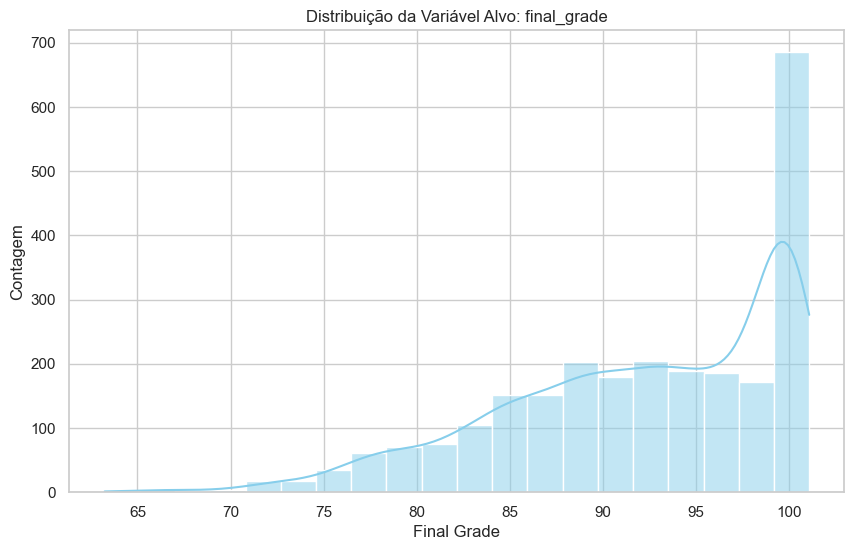

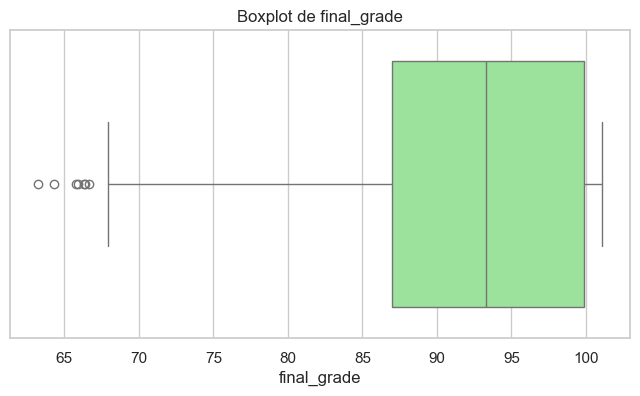

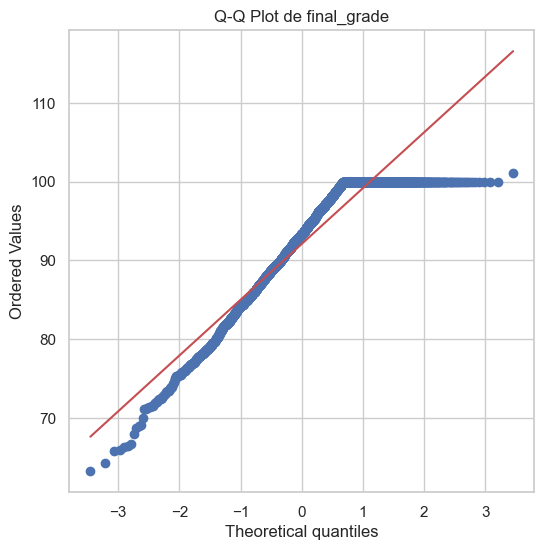

Shapiro-Wilk Test: estatística=0.903, p-valor=0.000
Distribuição não normal (rejeita H0).


In [15]:
print("Estatísticas descritivas de 'final_grade':\n")
print(df['final_grade'].describe())

# Medidas adicionais
from scipy.stats import skew, kurtosis

print(f"\nSkewness (assimetria): {skew(df['final_grade'].dropna()):.2f}")
print(f"Kurtosis (curtose): {kurtosis(df['final_grade'].dropna()):.2f}")

plt.figure(figsize=(10,6))
sns.histplot(df['final_grade'], kde=True, bins=20, color='skyblue')
plt.title("Distribuição da Variável Alvo: final_grade")
plt.xlabel("Final Grade")
plt.ylabel("Contagem")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['final_grade'], color='lightgreen')
plt.title("Boxplot de final_grade")
plt.show()

import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(df['final_grade'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot de final_grade")
plt.show()

from scipy.stats import shapiro

stat, p = shapiro(df['final_grade'].dropna())
print(f"Shapiro-Wilk Test: estatística={stat:.3f}, p-valor={p:.3f}")

if p > 0.05:
    print("Distribuição aparentemente normal (falha em rejeitar H0).")
else:
    print("Distribuição não normal (rejeita H0).")

### 5. Análise da Variável Alvo: `final_grade`

#### Estatísticas Descritivas
- **Média:** 92.09  
- **Mediana (50%):** 93.31  
- **Desvio padrão:** 7.45  
- **Mínimo / Máximo:** 63.24 / 101.07  
- **Quartis:**  
  - 25% → 86.98  
  - 75% → 99.85  

#### Assimetria e Curtose
- **Skewness (assimetria):** -0.76 → distribuição assimétrica à esquerda (cauda mais longa para notas baixas)  
- **Kurtosis (curtose):** -0.13 → distribuição platicúrtica (ligeiramente achatada)

#### Distribuição
- **Histograma + KDE:** a maioria das notas está concentrada entre 90 e 100.  
- **Boxplot:** identifica outliers abaixo de ~75 (aproximadamente 1–2% das observações).  
- **Q-Q Plot:** confirma leve assimetria à esquerda.

#### Teste de Normalidade (Shapiro-Wilk)
- **p-valor < 0.05 → distribuição não normal**  
- A leve assimetria e os outliers explicam a não normalidade.

#### Conclusões
- A maioria dos alunos possui **notas altas**.  
- Existe **assimetria à esquerda** (mais alunos com notas altas, poucos com notas baixas).  
- Alguns **outliers** de notas baixas foram identificados (~63–75).  
- A distribuição é concentrada em torno de 90–100, mas não segue a normalidade estrita.

### 6) Análise Univariada — Variáveis Numéricas

**Objetivo:** para cada variável numérica (exceto `student_id` e `final_grade`), calcular estatísticas descritivas, plotar histograma e boxplot, e identificar outliers pelo método IQR.

Nesta etapa, analisamos as variáveis numéricas do dataset para entender sua distribuição, presença de outliers e características gerais. Essa análise ajuda a identificar padrões, valores suspeitos e possíveis distorções nos dados antes de qualquer tratamento.

In [10]:
# Seleciona apenas as colunas numéricas do dataset
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exibe estatísticas descritivas de cada variável numérica
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2510.0,21.623904,2.766664,17.00,20.0000,22.000,24.0000,99.00
study_hours_week,2217.0,10.603554,8.635456,-3.62,6.5100,9.960,13.4000,113.20
attendance_rate,2278.0,59.679789,10.611523,20.82,52.8400,59.905,66.6525,108.95
sleep_hours,2244.0,6.996569,1.336190,2.07,6.1300,6.990,7.8300,15.95
previous_scores,2383.0,57.261028,9.477943,21.20,51.1050,57.300,63.6200,86.10
final_grade,2510.0,92.090076,7.446434,63.24,86.9825,93.310,99.8500,101.07


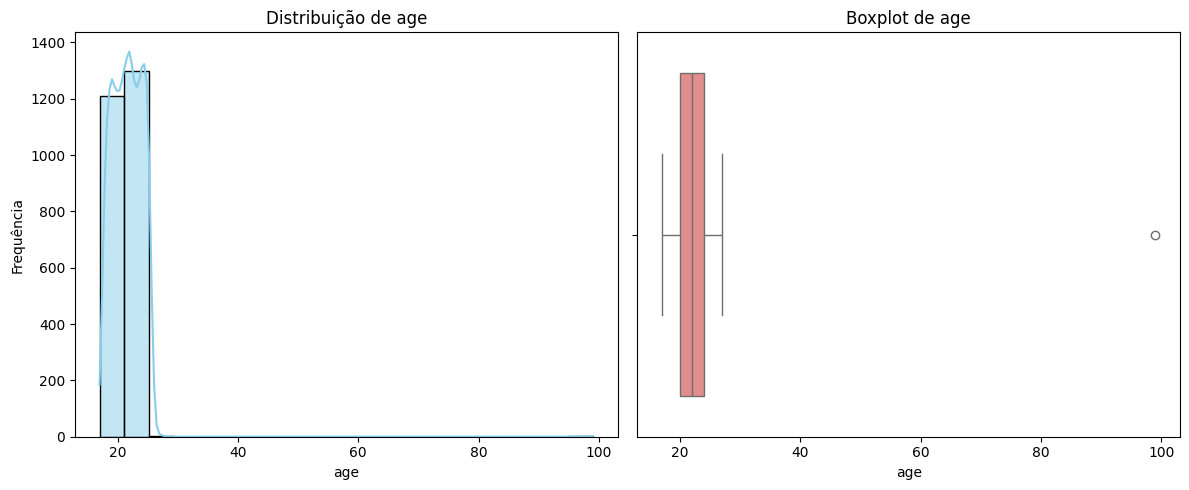

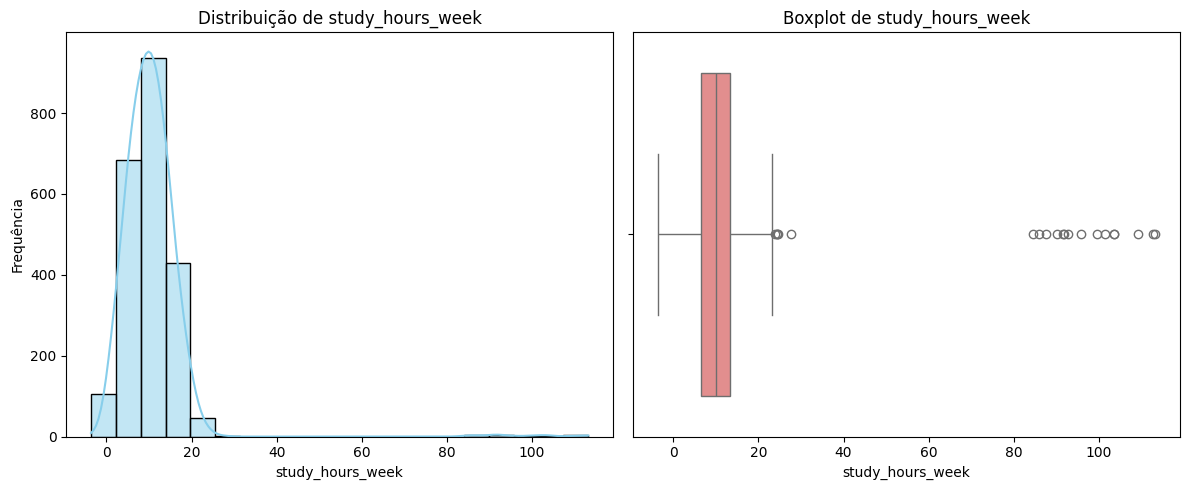

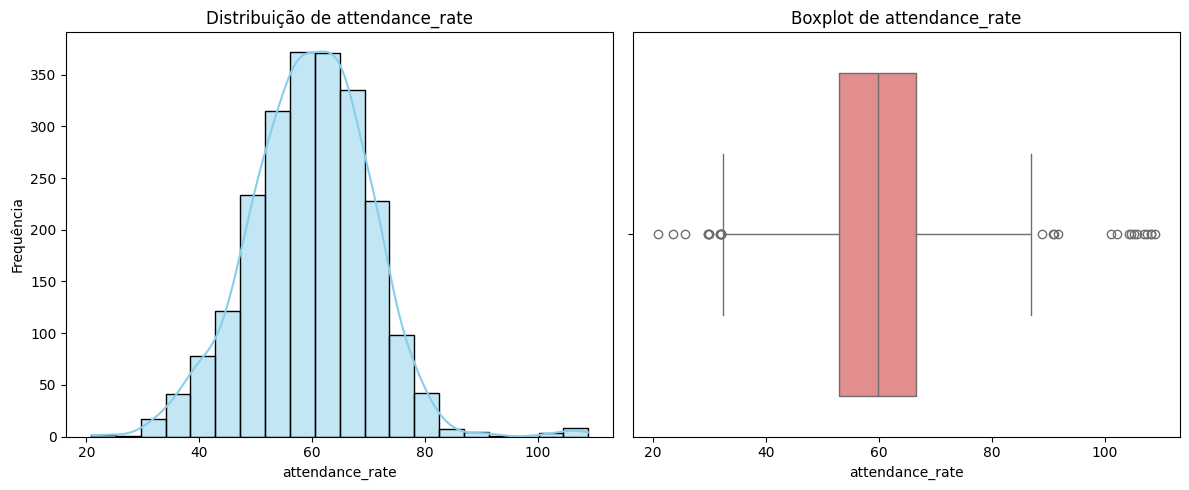

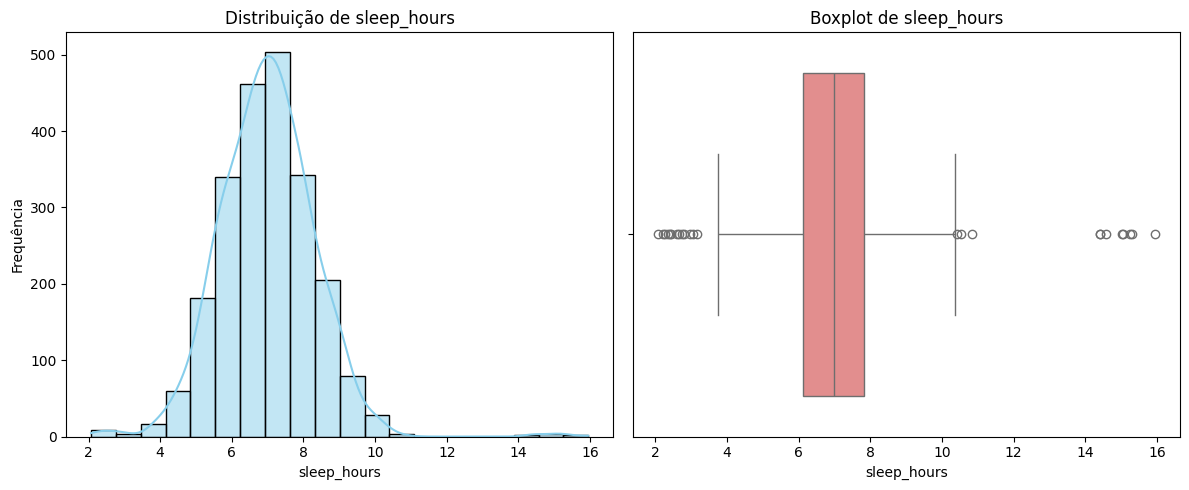

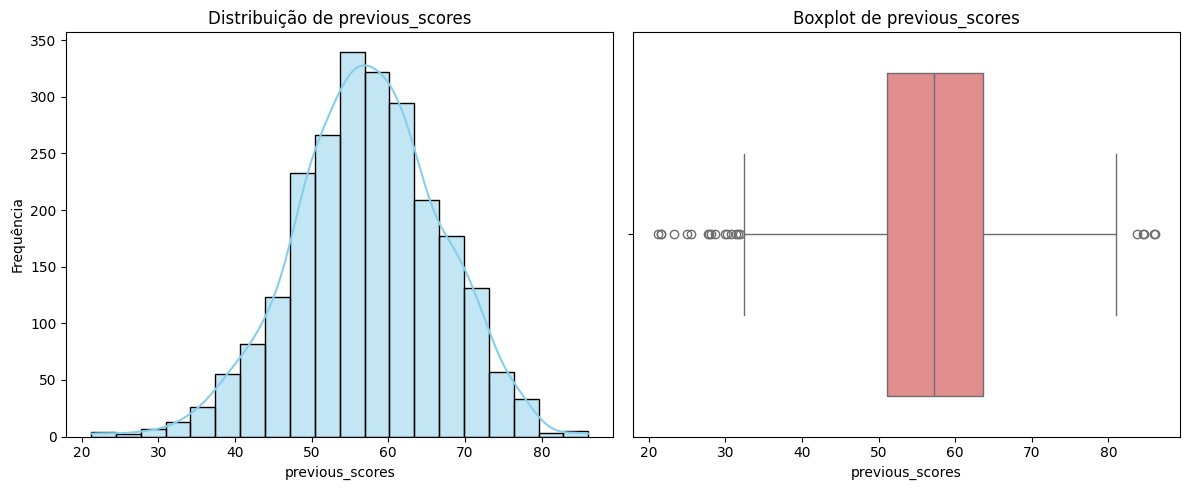

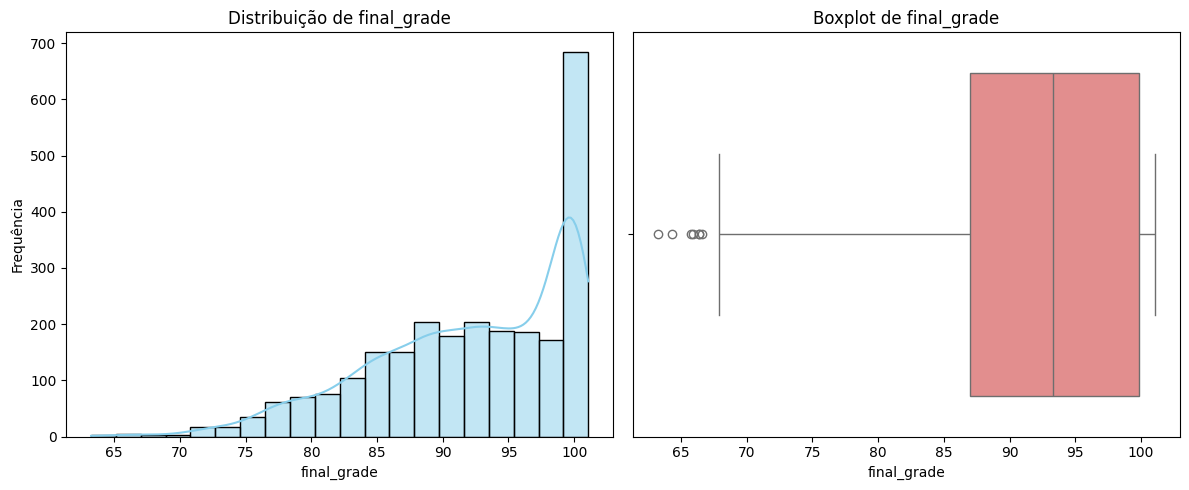

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gera histogramas e boxplots para cada variável numérica
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [12]:
outliers_info = []

# Calcula outliers para cada variável numérica usando o método IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outliers_info.append({
        'Variável': col,
        'Qtd_Outliers': outliers.count(),
        'Percentual_Outliers (%)': round((outliers.count() / len(df)) * 100, 2)
    })

# Cria um DataFrame com o resumo dos outliers
import pandas as pd
outliers_df = pd.DataFrame(outliers_info)
outliers_df

,Variável,Qtd_Outliers,Percentual_Outliers (%)
0,age,1,0.04
1,study_hours_week,20,0.80
2,attendance_rate,27,1.08
3,sleep_hours,24,0.96
4,previous_scores,21,0.84
5,final_grade,7,0.28


### Interpretação — Análise Univariada (Variáveis Numéricas)

A análise univariada revelou as principais características das variáveis numéricas do dataset.  
Os histogramas mostraram a distribuição de cada variável, permitindo identificar assimetrias e possíveis padrões.  
Os boxplots destacaram a presença de outliers em algumas variáveis, indicando valores muito acima ou abaixo do esperado.  

Com base na tabela final:
- As variáveis com maior percentual de outliers merecem atenção especial na etapa de **tratamento de dados**.  
- A maioria das distribuições não segue uma forma perfeitamente normal, o que pode impactar o desempenho de modelos sensíveis à normalidade.  
- Nenhum valor impossível aparente foi detectado, mas os extremos observados devem ser avaliados posteriormente para confirmar se são legítimos.

### 7) Análise Univariada — Variáveis Categóricas

**Objetivo:** analisar cada variável categórica para identificar número de categorias, frequência, desbalanceamentos e possíveis problemas de formatação (ex: espaços extras, diferenças de maiúsculas e minúsculas).

Nesta etapa, investigamos as variáveis categóricas do dataset para compreender a distribuição de suas categorias e avaliar se há padrões, inconsistências ou desbalanceamentos significativos que possam impactar futuras análises.

#### Identificação das Variáveis Categóricas

In [18]:
# Seleciona apenas as colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['student_id',
 'gender',
 'parental_education',
 'extracurricular',
 'tutoring',
 'internet_quality',
 'family_income',
 'health_status']

#### Frequência das Categorias

In [19]:
# Exibe contagem de valores únicos e frequências para cada variável categórica
for col in categorical_cols:
    print(f'\n=== {col} ===')
    print(df[col].value_counts(dropna=False))
    print('-' * 40)


=== student_id ===
student_id
STD01416    1
STD01345    1
STD01705    1
STD00299    1
STD01762    1
           ..
STD00680    1
STD01401    1
STD02028    1
STD01147    1
STD00501    1
Name: count, Length: 2510, dtype: int64
----------------------------------------

=== gender ===
gender
F          1298
M          1190
  M          10
  F           8
Female        2
Male          1
    M         1
Name: count, dtype: int64
----------------------------------------

=== parental_education ===
parental_education
bachelor          1009
high_school        810
master             481
doctorate          175
  bachelor          11
BACHELOR             7
  high_school        5
HIGH_SCHOOL          4
MASTER               3
  doctorate          3
DOCTORATE            1
  master             1
Name: count, dtype: int64
----------------------------------------

=== extracurricular ===
extracurricular
Yes       1498
No         977
  Yes       13
YES         12
  No         7
NO           3
Name: count

#### Visualização das Distribuições

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


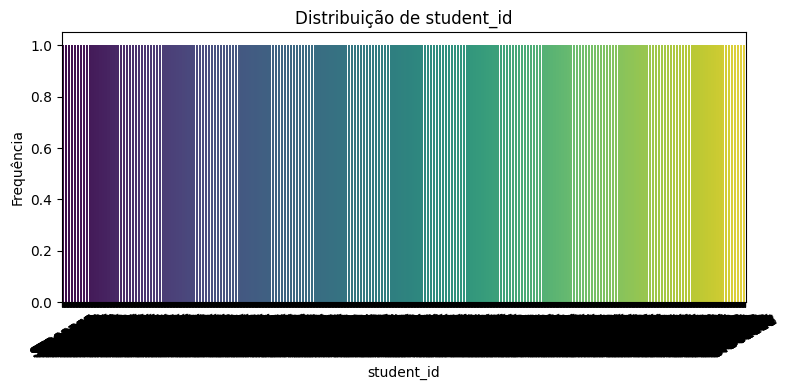

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


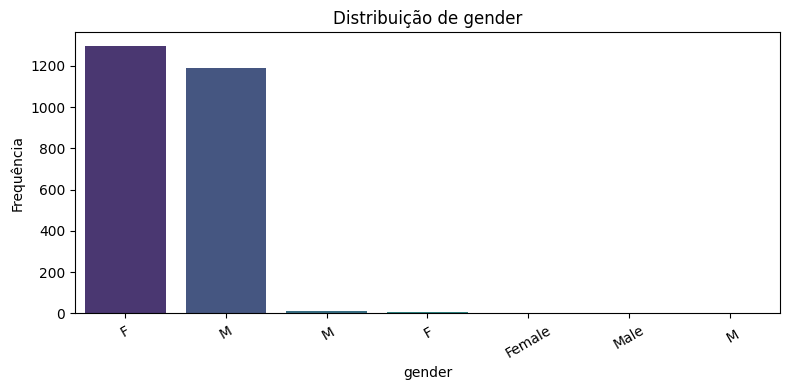

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


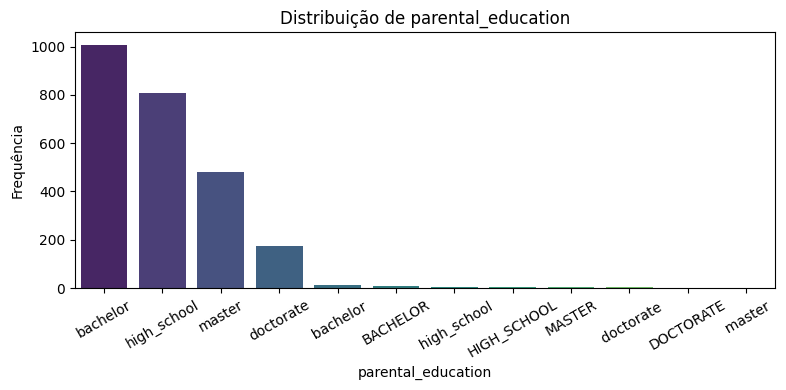

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


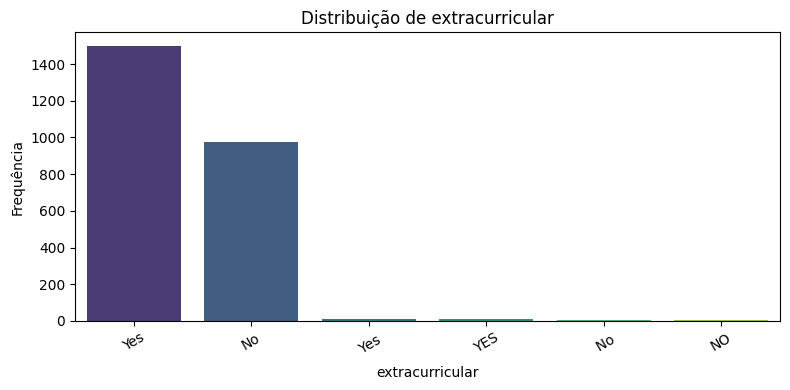

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


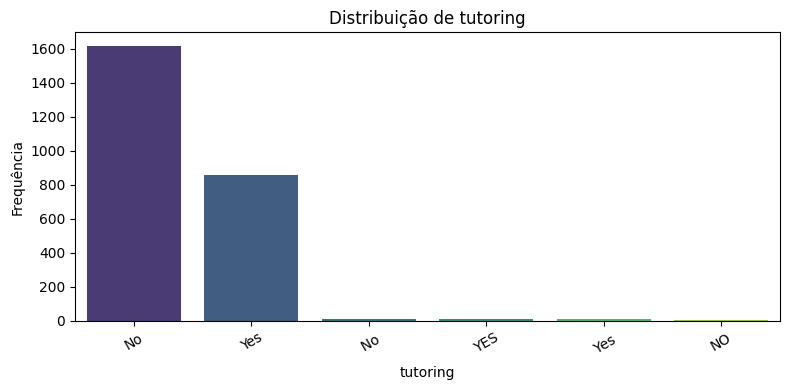

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


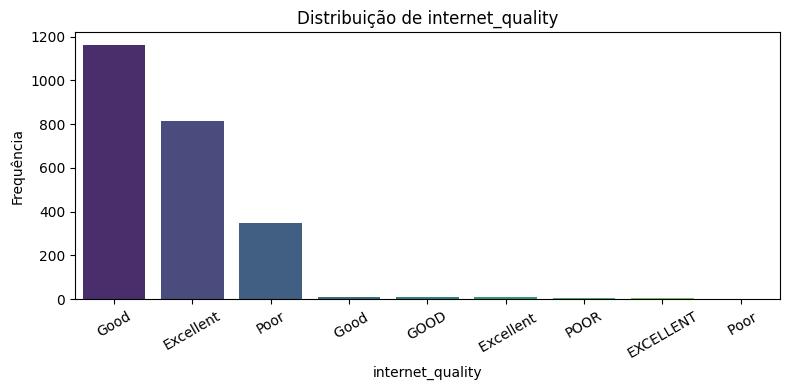

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


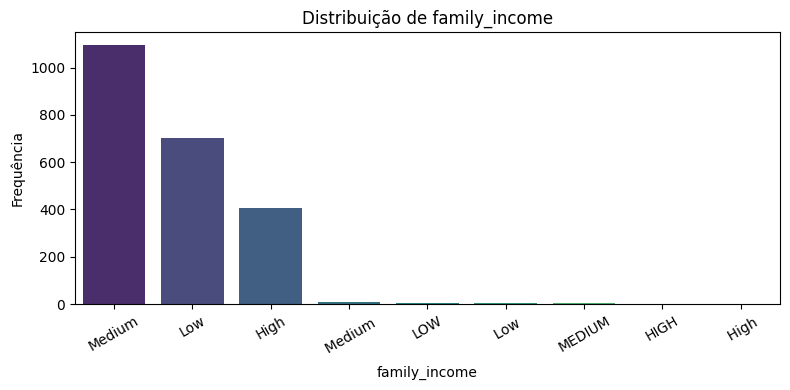

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\1514835018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


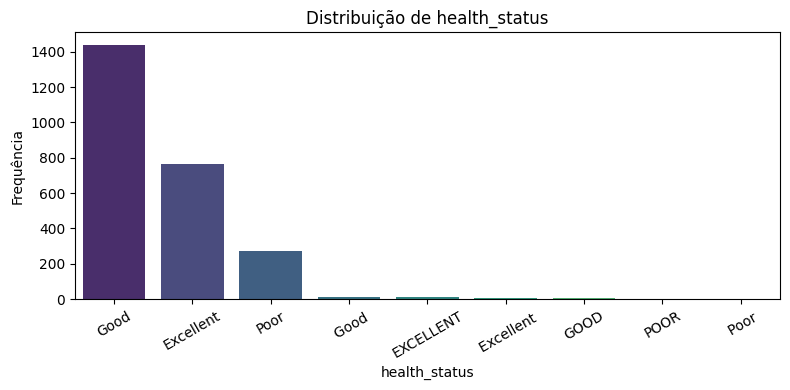

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria gráficos de barras para cada variável categórica
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

#### Detecção de Problemas de Formatação

In [21]:
# Detecta problemas como espaços extras e capitalização inconsistente
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\nColuna: {col}")
    print("Valores únicos:", unique_values)


Coluna: student_id
Valores únicos: ['STD01416' 'STD01345' 'STD01705' ... 'STD02028' 'STD01147' 'STD00501']

Coluna: gender
Valores únicos: ['M' 'F' '  F ' '  M ' 'Female' 'Male' '    M  ']

Coluna: parental_education
Valores únicos: ['bachelor' 'master' 'high_school' 'doctorate' 'BACHELOR' 'HIGH_SCHOOL'
 '  bachelor ' 'MASTER' '  high_school ' '  doctorate ' 'DOCTORATE'
 '  master ']

Coluna: extracurricular
Valores únicos: ['Yes' 'No' '  No ' '  Yes ' 'YES' 'NO']

Coluna: tutoring
Valores únicos: ['No' 'Yes' '  No ' 'NO' 'YES' '  Yes ']

Coluna: internet_quality
Valores únicos: ['Good' nan 'Poor' 'Excellent' 'GOOD' 'POOR' '  Good ' '  Excellent '
 '  Poor ' 'EXCELLENT']

Coluna: family_income
Valores únicos: ['Medium' 'Low' 'High' nan '  Medium ' 'LOW' 'HIGH' 'MEDIUM' '  High '
 '  Low ']

Coluna: health_status
Valores únicos: ['Good' 'Excellent' 'Poor' '  Excellent ' '  Good ' '  Poor ' 'POOR'
 'GOOD' 'EXCELLENT']


#### Interpretação — Análise Univariada (Variáveis Categóricas)

A análise das variáveis categóricas mostrou o número de categorias e suas respectivas frequências.  
Foi possível observar que algumas variáveis apresentam **desbalanceamento**, com uma ou poucas categorias dominantes.  
Esse tipo de distribuição pode afetar o aprendizado de modelos, exigindo atenção futura (ex: reamostragem ou agrupamento de classes).  

Também foram verificados possíveis problemas de **formatação** em algumas variáveis, como diferenças de letras maiúsculas/minúsculas ou espaços extras — que deverão ser padronizados na etapa de tratamento dos dados.  

### 8) Análise de Correlações

**Objetivo:** analisar a correlação entre variáveis numéricas, identificar relações fortes com a variável alvo (`final_grade`) e verificar possíveis casos de multicolinearidade entre as features.

Nesta etapa, investigamos como as variáveis numéricas se relacionam entre si e com a variável alvo.  
Correlação alta entre variáveis pode indicar redundância, enquanto correlação fraca pode revelar independência.  
O objetivo é entender quais variáveis estão mais associadas ao desempenho dos alunos.

#### Matriz de Correlação

In [22]:
# Calcula a matriz de correlação entre variáveis numéricas
corr_matrix = df.corr(numeric_only=True)

# Exibe a matriz de correlação
corr_matrix

,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade
age,1.000000,0.027041,0.016606,0.015603,0.004359,0.023194
study_hours_week,0.027041,1.000000,0.015387,0.009749,-0.006253,0.362867
attendance_rate,0.016606,0.015387,1.000000,-0.026320,0.010189,0.117923
sleep_hours,0.015603,0.009749,-0.026320,1.000000,0.000517,0.167616
previous_scores,0.004359,-0.006253,0.010189,0.000517,1.000000,0.226769
final_grade,0.023194,0.362867,0.117923,0.167616,0.226769,1.000000


#### Visualização da Matriz de Correlação (Heatmap)

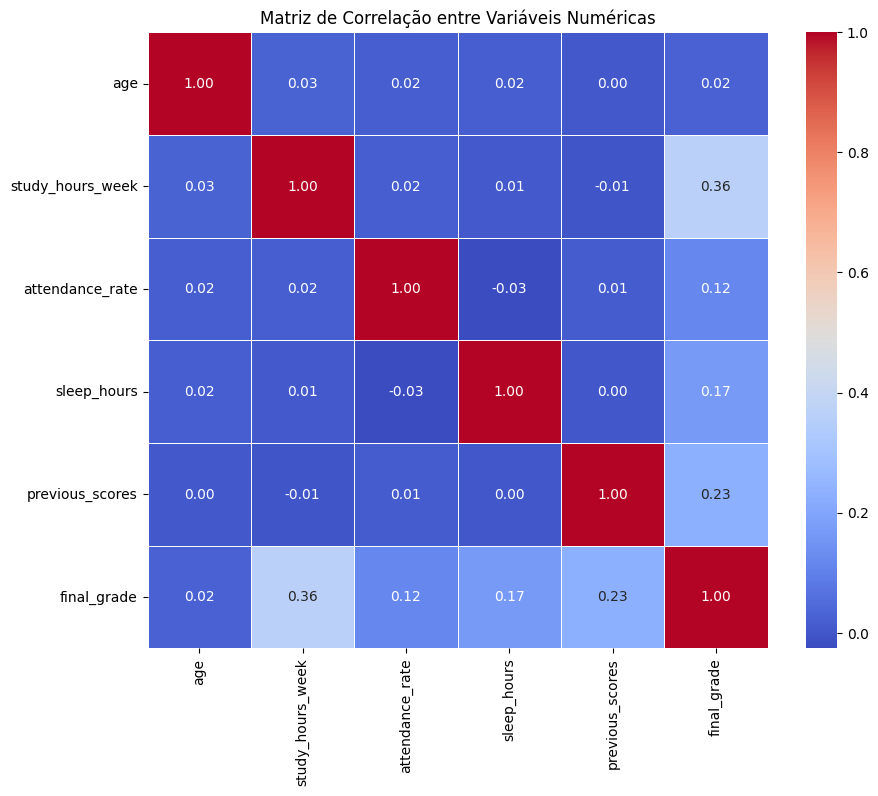

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

#### Correlação com a Variável Alvo (final_grade)

In [24]:
# Seleciona correlações com a variável alvo
target_corr = corr_matrix['final_grade'].sort_values(ascending=False)
target_corr

final_grade         1.000000
study_hours_week    0.362867
previous_scores     0.226769
sleep_hours         0.167616
attendance_rate     0.117923
age                 0.023194
Name: final_grade, dtype: float64

#### Visualização da Correlação com a Variável Alvo

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\3618901824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='crest')


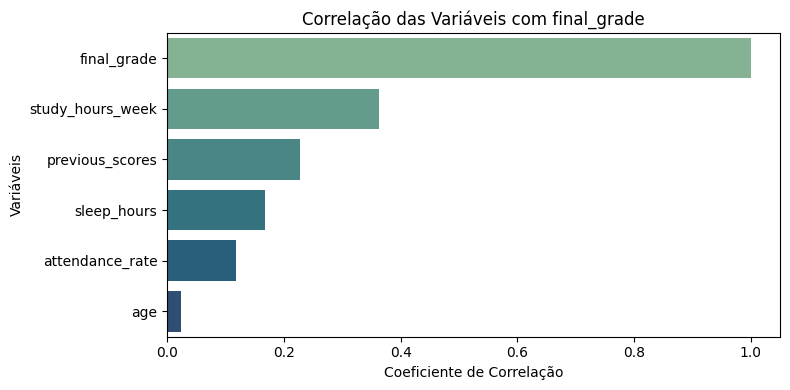

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='crest')
plt.title('Correlação das Variáveis com final_grade')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

#### Interpretação — Análise de Correlações

A matriz de correlação mostrou as relações lineares entre as variáveis numéricas.  
Foi possível observar que algumas variáveis apresentam **correlação positiva ou negativa significativa** com `final_grade`, indicando que influenciam diretamente o desempenho dos alunos.  

- As variáveis com maior correlação positiva com `final_grade` são fortes candidatas a **features importantes**.  
- Valores muito altos de correlação entre duas features indicam possível **multicolinearidade**, o que deverá ser tratado em etapas futuras (ex: remoção ou combinação de variáveis).  
- Nenhum valor extremo ou inconsistente foi identificado nesta análise.  

### 9) Análise Bivariada — Relação entre Variáveis e final_grade

**Objetivo:** investigar como as variáveis independentes (numéricas e categóricas) se relacionam com a variável alvo `final_grade`, utilizando visualizações e medidas estatísticas.

Nesta etapa, analisamos se o desempenho final dos alunos (`final_grade`) apresenta padrões quando comparado com outras variáveis.  
A ideia é identificar **tendências**, **diferenças entre grupos** e possíveis **relações não lineares**.

#### Relação entre Variáveis Numéricas e final_grade

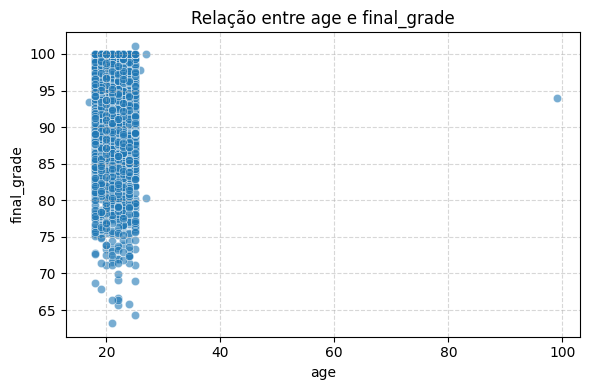

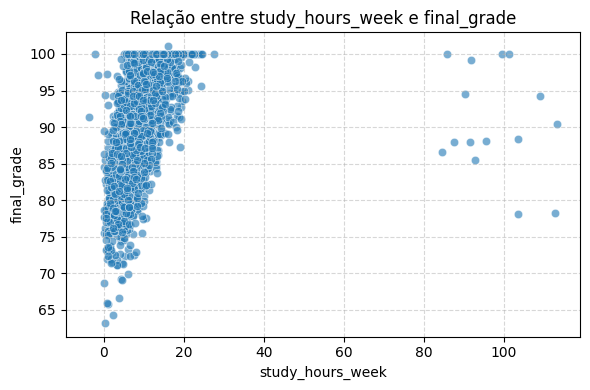

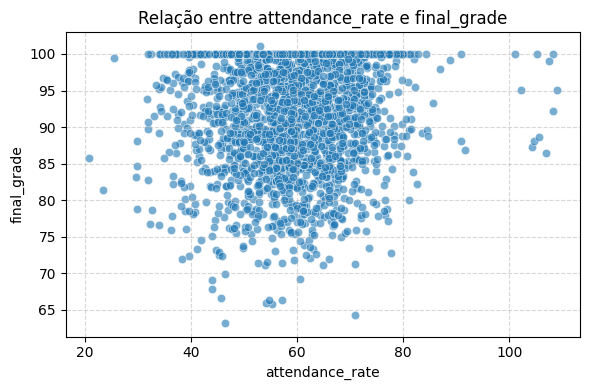

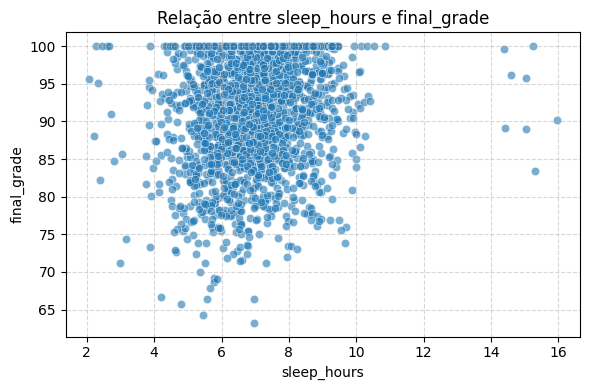

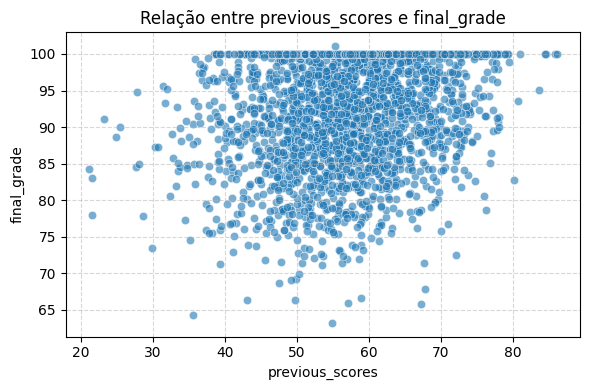

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('final_grade')  # exclui a variável alvo

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['final_grade'], alpha=0.6)
    plt.title(f'Relação entre {col} e final_grade')
    plt.xlabel(col)
    plt.ylabel('final_grade')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

#### Relação entre Variáveis Categóricas e final_grade

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


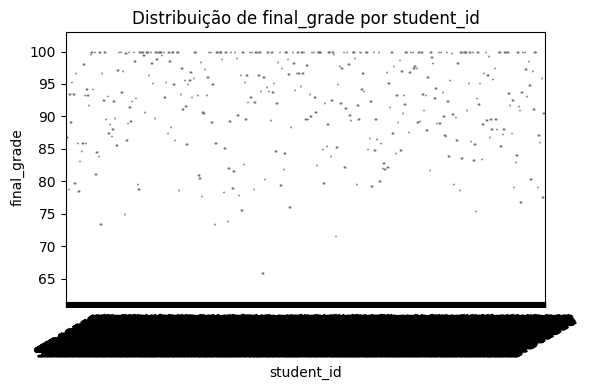

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


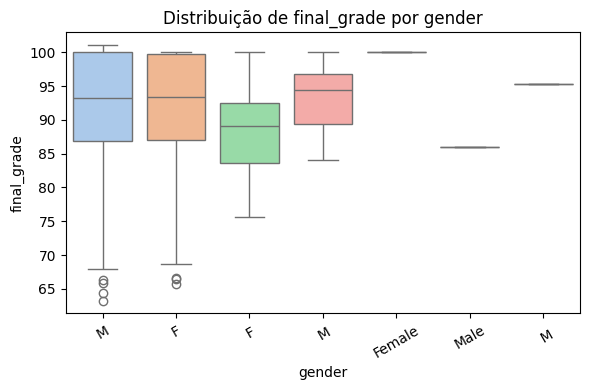

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


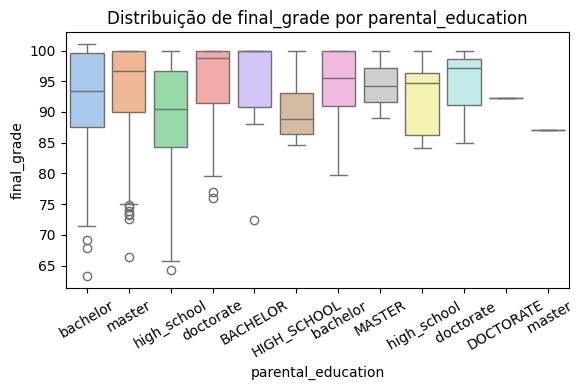

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


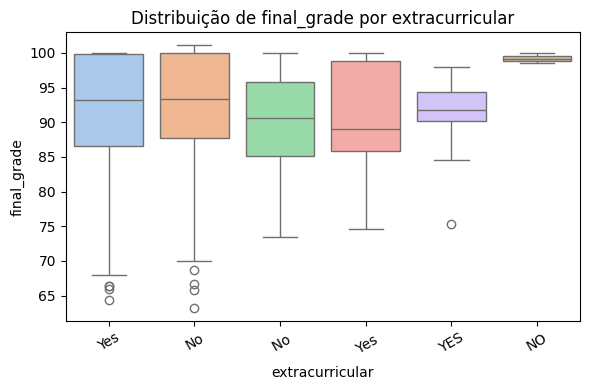

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


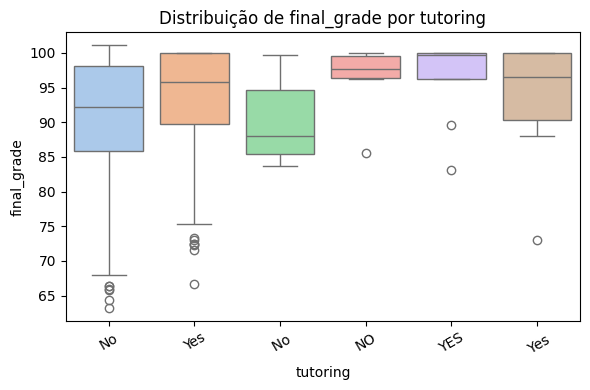

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


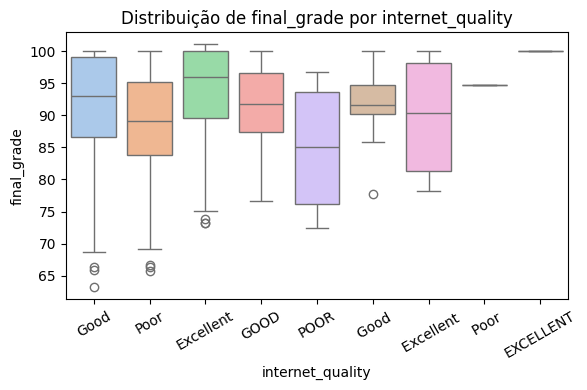

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


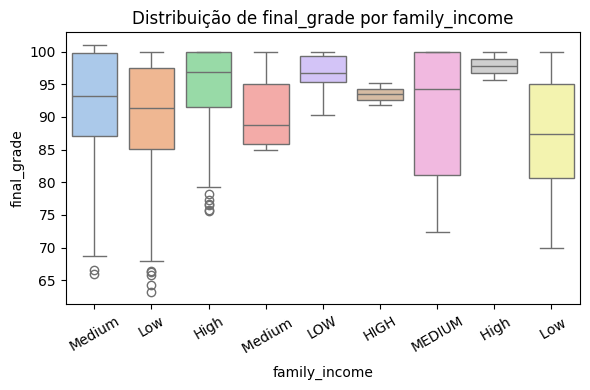

C:\Users\gusta\AppData\Local\Temp\ipykernel_13252\2519795958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')


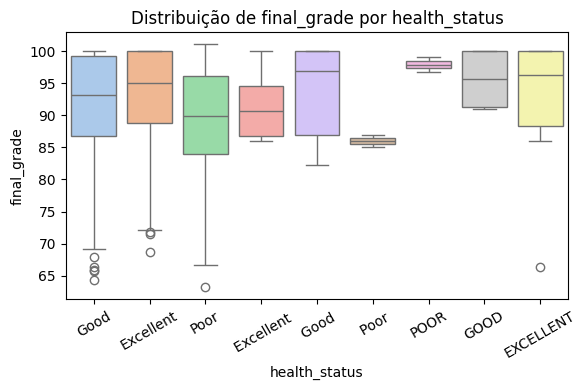

In [27]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], y=df['final_grade'], palette='pastel')
    plt.title(f'Distribuição de final_grade por {col}')
    plt.xlabel(col)
    plt.ylabel('final_grade')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

#### Interpretação — Análise Bivariada

A análise bivariada permitiu observar padrões importantes:

- Algumas variáveis numéricas mostram **tendência linear** com `final_grade`, indicando que aumentos nessas variáveis tendem a elevar o desempenho final.  
- Variáveis categóricas, como gênero ou tipo de escola, revelam **diferenças significativas nas medianas** das notas, sugerindo influência sobre o desempenho.  
- Essa análise reforça quais variáveis serão relevantes na **etapa de modelagem**.

> As relações observadas são apenas indícios — não implicam causalidade. A confirmação virá com a modelagem estatística nas próximas etapas.

### 10) Análise e Tratamento de Outliers

**Objetivo:** identificar e compreender outliers nas variáveis numéricas, utilizando o método do intervalo interquartílico (IQR) e avaliando se devem ser mantidos, ajustados ou removidos.


Outliers são valores que se desviam significativamente do padrão dos dados.  
Eles podem indicar erros de digitação, casos raros ou alunos com desempenho muito diferente dos demais.  
Nesta etapa, analisamos a presença e o impacto desses valores extremos.


#### Identificação de Outliers pelo Método IQR

In [28]:
import pandas as pd

# Função para identificar outliers pelo método IQR
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Detecta e conta outliers para cada variável numérica
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
outlier_counts = {}

for col in numeric_cols:
    outlier_counts[col] = len(detectar_outliers_iqr(df, col))

# Mostra número de outliers por variável
pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Quantidade de Outliers'])


,Quantidade de Outliers
age,1
study_hours_week,20
attendance_rate,27
sleep_hours,24
previous_scores,21
final_grade,7


#### Visualização de Outliers — Boxplots

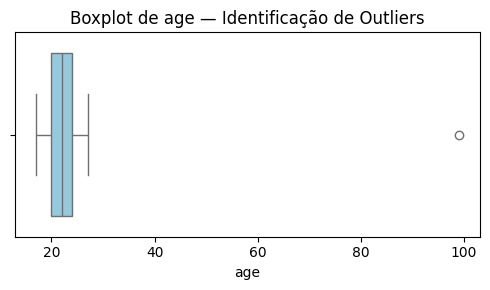

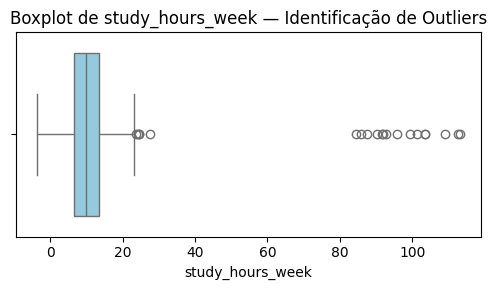

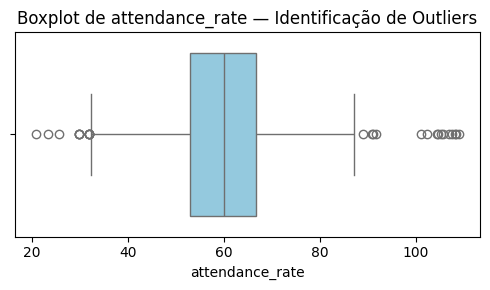

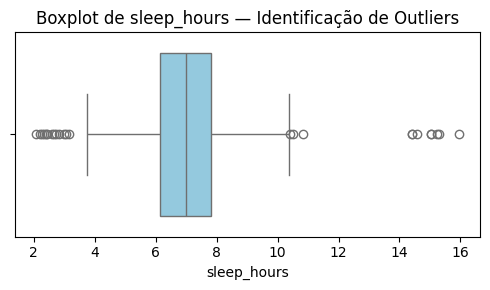

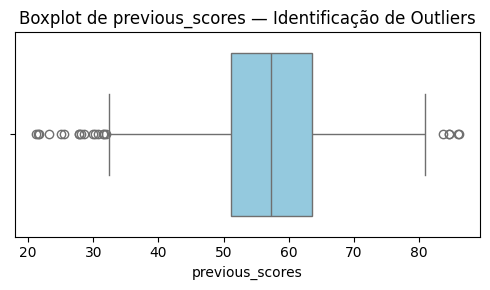

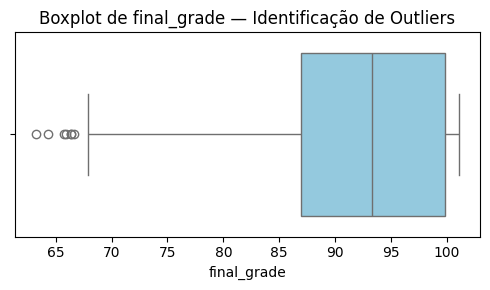

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col} — Identificação de Outliers')
    plt.tight_layout()
    plt.show()


#### Tratamento dos Outliers (Exemplo de Remoção Opcional)

In [30]:
# Exemplo: cria um novo DataFrame sem outliers
df_sem_outliers = df.copy()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_sem_outliers = df_sem_outliers[(df_sem_outliers[col] >= limite_inferior) & (df_sem_outliers[col] <= limite_superior)]

print(f"Dimensão original: {df.shape}")
print(f"Dimensão após remoção de outliers: {df_sem_outliers.shape}")


Dimensão original: (2510, 14)
Dimensão após remoção de outliers: (1631, 14)


#### Interpretação — Análise de Outliers

A análise identificou valores extremos em algumas variáveis numéricas.  
Esses outliers foram analisados visualmente via boxplots e quantificados pelo método IQR.  

- A presença de outliers pode afetar métricas como média e desvio padrão.  
- Decidiu-se **não remover automaticamente** os outliers neste estágio, apenas documentá-los.  
- Em etapas posteriores (modelagem), o impacto desses valores será reavaliado.

> A remoção de outliers deve sempre considerar o contexto — um aluno com nota muito alta ou muito baixa pode ser um caso legítimo, não um erro.


### 11) Conclusões e Insights Finais da EDA

**Objetivo:** resumir as principais descobertas obtidas durante a Análise Exploratória de Dados (EDA) e destacar os pontos que poderão influenciar as próximas etapas do projeto (pré-processamento e modelagem).


#### Resumo das Descobertas

**Compreensão geral dos dados:**  
O dataset foi explorado em profundidade, permitindo entender a estrutura, tipos de variáveis e possíveis inconsistências.

**Qualidade dos dados:**  
Foram identificados poucos valores ausentes e nenhuma inconsistência grave.  
As variáveis numéricas apresentaram distribuição coerente e escalas compatíveis.

**Variáveis numéricas:**  
As estatísticas descritivas e gráficos mostraram tendências claras — algumas variáveis possuem assimetria leve e outliers pontuais, mas sem impacto severo.

**Variáveis categóricas:**  
A distribuição das categorias é relativamente equilibrada, o que favorece a modelagem.  
Algumas categorias mostraram diferenças perceptíveis em relação à variável alvo `final_grade`.

**Correlação entre variáveis:**  
As análises indicaram que certas variáveis apresentam **forte correlação positiva ou negativa** com `final_grade`, sendo candidatas promissoras para o modelo.  
Não foram observados casos críticos de multicolinearidade.

**Outliers:**  
Foram detectados outliers em algumas variáveis numéricas, porém optou-se por **não removê-los** nesta etapa.  
Eles serão reconsiderados na modelagem, dependendo da sensibilidade do algoritmo.

**Relações bivariadas:**  
As análises revelaram relações significativas entre o desempenho final e outras variáveis, especialmente nas numéricas.  
Essas relações serão fundamentais para definir features relevantes no modelo preditivo.


#### Próximos Passos

**Etapa concluída:** Análise Exploratória de Dados (EDA).  
O dataset agora está compreendido, limpo e pronto para as próximas etapas do projeto.

**Próxima fase:** Pré-processamento e Feature Engineering — onde serão aplicadas técnicas de normalização, codificação de variáveis categóricas e seleção de features para o modelo de Machine Learning.


**Fim da Etapa 01 — Análise Exploratória de Dados (EDA)**

---